In [2]:
# import library

import pandas as pd

In [3]:
# load dataset

dataset=pd.read_csv("CSUSHPISA.csv")
dataset

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
435,2023-04-01,300.198
436,2023-05-01,302.620
437,2023-06-01,304.651
438,2023-07-01,306.634


# Standardization/ Normalizaton
# MinMax Scaler

In [4]:
# Time Series - Univariate

column="CSUSHPISA"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(dataset[[column]])
print("Len:",data1.shape)

Len: (440, 1)


In [6]:
len(data1)

440

# Split Training and Testing data using series of data

In [7]:
# x_train, x_test  - input training and testing data
# y_train, y_test  - output training and testing data

training_size = round(len(data1 ) * 0.80)  # Total -440
print(training_size)

X_train=data1[:training_size]              # first 0:352
X_test=data1[training_size:]               # 88: last
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)

y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

352
X_train length: (352, 1)
X_test length: (88, 1)
y_train length: (352, 1)
y_test length: (88, 1)


# Model Creation

In [7]:
# ! pip install stockFunctions

ERROR: Could not find a version that satisfies the requirement stockFunctions (from versions: none)
ERROR: No matching distribution found for stockFunctions


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# AutoRegressive Moving Average

orders=[(1,1,1),(1,1,2),(2,3,1),(2,2,2)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(X_train, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
    #print(y_pred)    
    
    from sklearn import metrics
      
    # rmse - root mean squared error
    print("rmse :", metrics.mean_squared_error(y_test,y_pred))
    # mape - mean absolute percentage error
    print("mape :", metrics.mean_absolute_percentage_error(y_test,y_pred))
        
        
    print("************")

rmse : 0.060241059309298794
mape : 0.2218428632090114
************
rmse : 0.060872714085471194
mape : 0.2234090446976679
************
rmse : 14.915339192609348
mape : 3.501660430576733
************
rmse : 0.026033688796240618
mape : 0.1316399427009496
************


In [10]:
len(y_pred)


88

# Graph

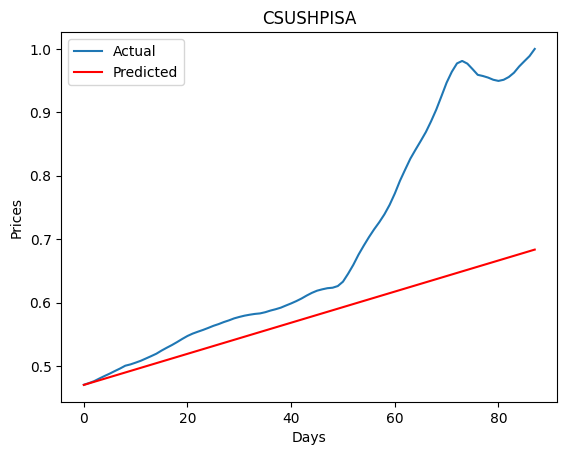

In [11]:
import matplotlib.pyplot as plt

# plt.plot("Actual ",y_test)
# plt.plot("Predicted ", y_pred,colors='red')
plt.title("CSUSHPISA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(y_test, label='Actual')
plt.plot(y_pred,color='red', label='Predicted')
plt.legend()
plt.show()

In [12]:
len(data1)

440

In [13]:
# Actual values

y_test

array([[0.47043868],
       [0.47310737],
       [0.47616312],
       [0.48030264],
       [0.48426697],
       [0.48804387],
       [0.49215487],
       [0.49609068],
       [0.50049096],
       [0.50256072],
       [0.50532719],
       [0.5083096 ],
       [0.5119439 ],
       [0.51559858],
       [0.51941623],
       [0.52435839],
       [0.52882386],
       [0.53308561],
       [0.53778332],
       [0.542754  ],
       [0.54738245],
       [0.55110231],
       [0.55409287],
       [0.55692046],
       [0.56004954],
       [0.56336605],
       [0.56609585],
       [0.56927791],
       [0.57198734],
       [0.57511235],
       [0.5773899 ],
       [0.57938632],
       [0.58089383],
       [0.5821528 ],
       [0.58296359],
       [0.58483371],
       [0.58740868],
       [0.58953141],
       [0.59198823],
       [0.59541067],
       [0.59871496],
       [0.60236148],
       [0.60642359],
       [0.61110907],
       [0.61534231],
       [0.61877697],
       [0.62092821],
       [0.622

In [14]:
# actual values -  y_test
# Convert minmax scaler into inverse_transform 

actual=Ms.inverse_transform(y_test)

In [15]:
# Predcted values

y_pred

array([0.47019015, 0.4726429 , 0.47509564, 0.47754839, 0.48000114,
       0.48245389, 0.48490664, 0.48735938, 0.48981213, 0.49226488,
       0.49471763, 0.49717038, 0.49962312, 0.50207587, 0.50452862,
       0.50698137, 0.50943412, 0.51188686, 0.51433961, 0.51679236,
       0.51924511, 0.52169786, 0.5241506 , 0.52660335, 0.5290561 ,
       0.53150885, 0.53396159, 0.53641434, 0.53886709, 0.54131984,
       0.54377259, 0.54622533, 0.54867808, 0.55113083, 0.55358358,
       0.55603633, 0.55848907, 0.56094182, 0.56339457, 0.56584732,
       0.56830007, 0.57075281, 0.57320556, 0.57565831, 0.57811106,
       0.5805638 , 0.58301655, 0.5854693 , 0.58792205, 0.5903748 ,
       0.59282754, 0.59528029, 0.59773304, 0.60018579, 0.60263854,
       0.60509128, 0.60754403, 0.60999678, 0.61244953, 0.61490228,
       0.61735502, 0.61980777, 0.62226052, 0.62471327, 0.62716602,
       0.62961876, 0.63207151, 0.63452426, 0.63697701, 0.63942975,
       0.6418825 , 0.64433525, 0.646788  , 0.64924075, 0.65169

In [16]:
# Reshape y_pred values

y_pred_reshape=y_pred.reshape(-1,1)
y_pred_reshape

array([[0.47019015],
       [0.4726429 ],
       [0.47509564],
       [0.47754839],
       [0.48000114],
       [0.48245389],
       [0.48490664],
       [0.48735938],
       [0.48981213],
       [0.49226488],
       [0.49471763],
       [0.49717038],
       [0.49962312],
       [0.50207587],
       [0.50452862],
       [0.50698137],
       [0.50943412],
       [0.51188686],
       [0.51433961],
       [0.51679236],
       [0.51924511],
       [0.52169786],
       [0.5241506 ],
       [0.52660335],
       [0.5290561 ],
       [0.53150885],
       [0.53396159],
       [0.53641434],
       [0.53886709],
       [0.54131984],
       [0.54377259],
       [0.54622533],
       [0.54867808],
       [0.55113083],
       [0.55358358],
       [0.55603633],
       [0.55848907],
       [0.56094182],
       [0.56339457],
       [0.56584732],
       [0.56830007],
       [0.57075281],
       [0.57320556],
       [0.57565831],
       [0.57811106],
       [0.5805638 ],
       [0.58301655],
       [0.585

In [17]:
# predicted values -  y_pred
# Convert minmax scaler into inverse_transform 

predicted=Ms.inverse_transform(y_pred_reshape)
predicted

array([[179.36799999],
       [179.96999999],
       [180.57199998],
       [181.17399997],
       [181.77599997],
       [182.37799996],
       [182.97999996],
       [183.58199995],
       [184.18399994],
       [184.78599994],
       [185.38799993],
       [185.98999993],
       [186.59199992],
       [187.19399991],
       [187.79599991],
       [188.3979999 ],
       [188.9999999 ],
       [189.60199989],
       [190.20399989],
       [190.80599988],
       [191.40799987],
       [192.00999987],
       [192.61199986],
       [193.21399986],
       [193.81599985],
       [194.41799984],
       [195.01999984],
       [195.62199983],
       [196.22399983],
       [196.82599982],
       [197.42799981],
       [198.02999981],
       [198.6319998 ],
       [199.2339998 ],
       [199.83599979],
       [200.43799979],
       [201.03999978],
       [201.64199977],
       [202.24399977],
       [202.84599976],
       [203.44799976],
       [204.04999975],
       [204.65199974],
       [205

In [18]:
from UserDefinedFns import conversionSingle
actual=Ms.inverse_transform(y_test)
actual_price=conversionSingle(actual,[column])
actual_price

,CSUSHPISA
0,179.429
1,180.084
2,180.834
3,181.85
4,182.823
...,...
83,300.198
84,302.62
85,304.651
86,306.634


In [19]:
from UserDefinedFns import conversionSingle
predicted=Ms.inverse_transform(y_pred_reshape)
predicted_price=conversionSingle(predicted,[column])
predicted_price

,CSUSHPISA
0,179.368
1,179.97
2,180.572
3,181.174
4,181.776
...,...
83,229.334
84,229.935999
85,230.537999
86,231.139999


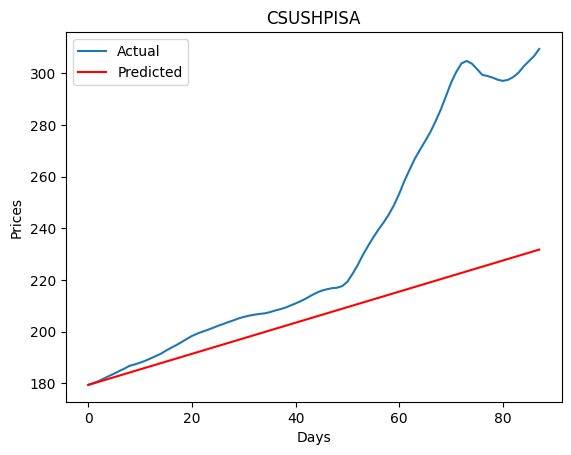

In [20]:
import matplotlib.pyplot as plt

plt.title("CSUSHPISA")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.plot(actual_price, label='Actual')
plt.plot(predicted_price,color='red', label='Predicted')
plt.legend()
plt.show()

# Evaluation Metrics

In [21]:
# Evaluation metrics for actual price and predicted price

# rmse - root mean squared error
print("rmse :", metrics.mean_squared_error(actual_price,predicted_price))
# mape - mean absolute percentage error
print("mape :", metrics.mean_absolute_percentage_error(actual_price,predicted_price))

rmse : 1568.2772940298412
mape : 0.09983124246841393


# CSUSHPISA Forcasted for 5 days

In [22]:
# Time Series Analysis - Forcasting
# CSUSHPISA Forecast for 5 days 

forecast=model_fit.predict(len(data1), len(data1)+4)
forecast

array([0.68603197, 0.68848471, 0.69093746, 0.69339021, 0.69584296])

In [23]:
from UserDefinedFns import conversionSingle

forecastTable=conversionSingle(forecast,["Predicted_CSUSHPISA"])
forecast_price=Ms.inverse_transform(forecastTable)
Predicted_forecast_price=conversionSingle(forecast_price,["Predicted_CSUSHPISA"])
Predicted_forecast_price

,Predicted_CSUSHPISA
0,232.343999
1,232.945999
2,233.547999
3,234.149999
4,234.751999


In [24]:
Predicted_forecast_price.to_csv("Predicted_CSUSHPISA.csv",index=False)